# **PCA**







#Step 1 : import libraries

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [16]:
print('Original Dataframe shape :',df.shape)


Original Dataframe shape : (150, 5)


#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


#Step 6: Fitting Logistic Regression To the training set




In [21]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)


LogisticRegression(random_state=0)

#Step 7: Predicting the test set result




In [22]:
y_pred = classifier.predict(X_test_pca)


#Step 8: Making the confusion matrix




In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy: 0.8666666666666667


#Step 9: Predicting the training set result




In [24]:
y_train_pred = classifier.predict(X_train_pca)


#Step 10: Visualizing the Test set results




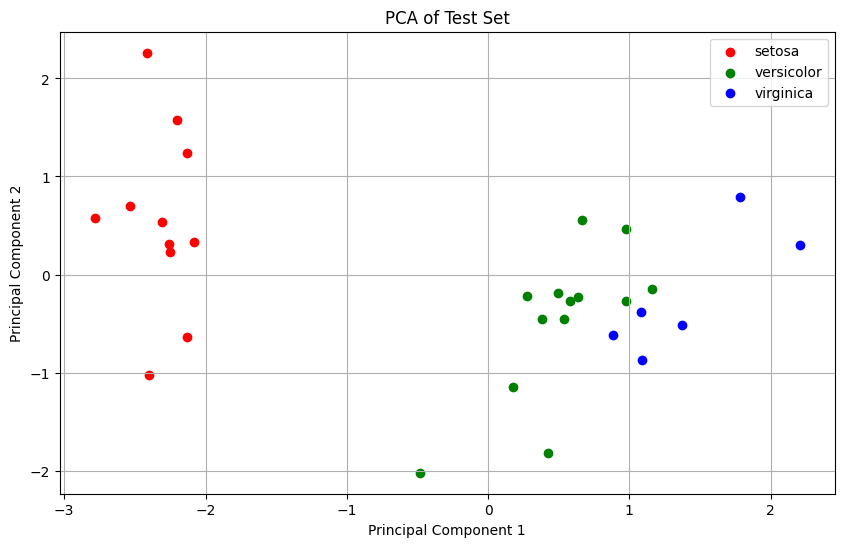

In [25]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i, color in zip(np.unique(y_test), colors):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], c=color, label=iris.target_names[i])
plt.title('PCA of Test Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


#**Well Done :)**
Now let's practice!